# Experiment 29

Goal: Analyze the effects of different methods on the results of the GASP algorithm.

In [1]:
import sys
sys.path.insert(0, '../../')  

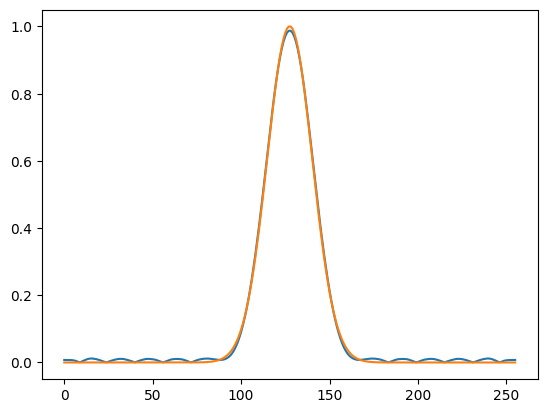

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt 
from gasp import process_data_for_gasp, train_gasp, run_gasp, simulate_ssfp, simulate_ssfp_sampling, responses, sampling, SSFPParams

# Simulate ssfp with tissue phantom 
M1 = simulate_ssfp(width = 256, height = 1, npcs = 12, TRs = [3e-3, 6e-3, 12e-3], alpha = np.deg2rad(10), gradient = 2 * np.pi, phantom_type='line-muscle', phantom_padding=0)
D1 = responses.gaussian(width=256, bw=0.2, shift=0.-2)
#D1 = responses.square(width=256, bw=0.2, shift=0.2)

# Train gasp model coefficients
Ic1, An1 = train_gasp(process_data_for_gasp(M1)[0], D1, method='linear')

# Plot results
plt.plot(np.abs(Ic1).T)
plt.plot(D1)
plt.show()

(5, 11)


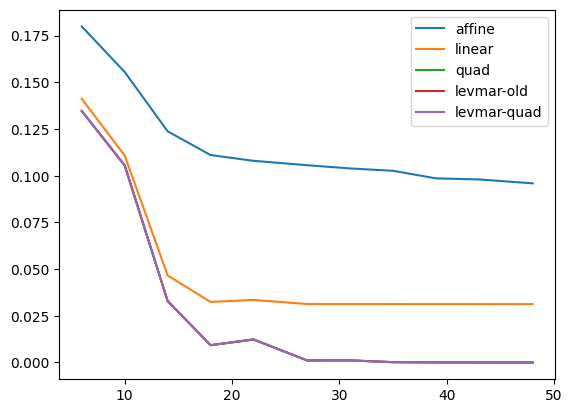

In [12]:
D = responses.gaussian(width=256, bw=0.2, shift=-0.2)
tr_range = (5e-3, 20e-3)

methods = ['affine', 'linear', 'quad', 'levmar-old', 'levmar-quad']

n_points = np.linspace(6, 48, 11).astype(np.int64)   
RMSE = np.zeros((len(methods), len(n_points)))
print(RMSE.shape)
for i, scheme in enumerate(methods):
    for j, n in enumerate(n_points):
        TRs, PCs = sampling.grid_pow2_sampling(n_points=n, n_turns=3, tr_range=tr_range)
        params = SSFPParams(n, np.deg2rad(60), TRs, PCs)
        M = simulate_ssfp_sampling(width=256, height=1, params=params, minTR = np.min(params.TRs), gradient = 2 * np.pi, phantom_type='line')
        Ic, An = train_gasp(M, D, method=scheme)
        RMSE[i, j] = np.sqrt(np.mean((np.abs(Ic) - D)**2))
        #plt.plot(np.abs(Ic).T)

plt.plot(n_points, RMSE.T)
plt.legend(methods)
plt.show()

(4, 11)


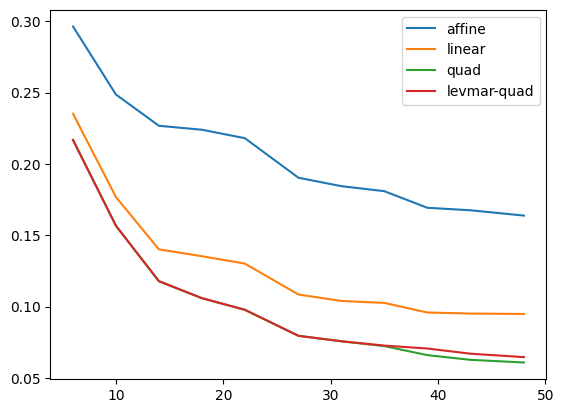

In [13]:
D = responses.square(width=256, bw=0.2, shift=-0.2)
tr_range = (5e-3, 20e-3)

methods = ['affine', 'linear', 'quad', 'levmar-quad']

n_points = np.linspace(6, 48, 11).astype(np.int64)   
RMSE = np.zeros((len(methods), len(n_points)))
print(RMSE.shape)
for i, scheme in enumerate(methods):
    for j, n in enumerate(n_points):
        TRs, PCs = sampling.grid_pow2_sampling(n_points=n, n_turns=3, tr_range=tr_range)
        params = SSFPParams(n, np.deg2rad(60), TRs, PCs)
        M = simulate_ssfp_sampling(width=256, height=1, params=params, minTR = np.min(params.TRs), gradient = 2 * np.pi, phantom_type='line')
        Ic, An = train_gasp(M, D, method=scheme)
        RMSE[i, j] = np.sqrt(np.mean((np.abs(Ic) - D)**2))
        #plt.plot(np.abs(Ic).T)

plt.plot(n_points, RMSE.T)
plt.legend(methods)
plt.show()

(4, 11)


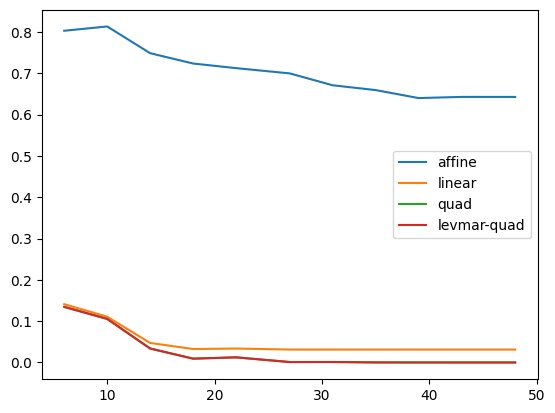

In [10]:
D = responses.notch(width=256, bw=0.2, shift=-0.2)
tr_range = (5e-3, 20e-3)

methods = ['affine', 'linear', 'quad', 'levmar-quad']

n_points = np.linspace(6, 48, 11).astype(np.int64)   
RMSE = np.zeros((len(methods), len(n_points)))
print(RMSE.shape)
for i, scheme in enumerate(methods):
    for j, n in enumerate(n_points):
        TRs, PCs = sampling.grid_pow2_sampling(n_points=n, n_turns=3, tr_range=tr_range)
        params = SSFPParams(n, np.deg2rad(60), TRs, PCs)
        M = simulate_ssfp_sampling(width=256, height=1, params=params, minTR = np.min(params.TRs), gradient = 2 * np.pi, phantom_type='line')
        Ic, An = train_gasp(M, D, method=scheme)
        RMSE[i, j] = np.sqrt(np.mean((np.abs(Ic) - D)**2))
        #plt.plot(np.abs(Ic).T)

plt.plot(n_points, RMSE.T)
plt.legend(methods)
plt.show()

(4, 11)


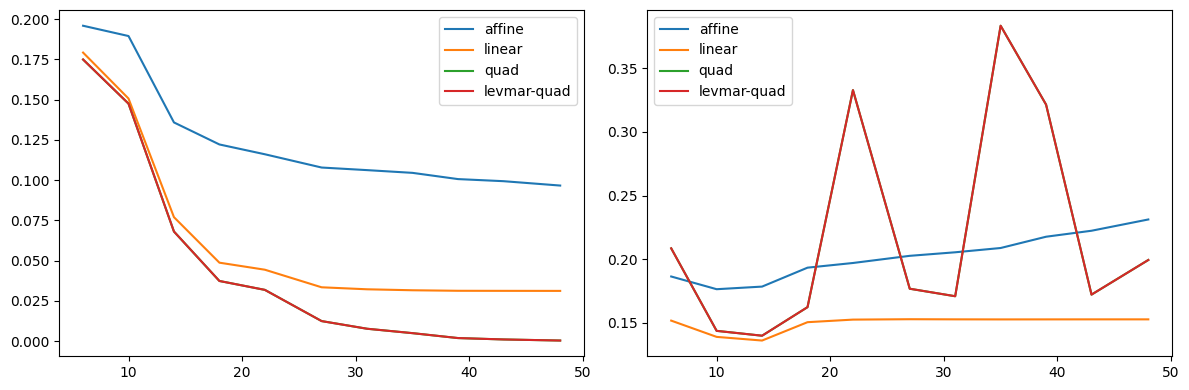

In [24]:
D = responses.gaussian(width=256, bw=0.2, shift=-0.2)
alpha1 = np.deg2rad(20)
alpha2 = np.deg2rad(60)
tr_range = (5e-3, 20e-3)

methods = ['affine', 'linear', 'quad', 'levmar-quad']

n_points = np.linspace(6, 48, 11).astype(np.int64)   
RMSE = np.zeros((len(methods), len(n_points)))
RMSE2 = np.zeros((len(methods), len(n_points)))
print(RMSE.shape)
for i, scheme in enumerate(methods):
    for j, n in enumerate(n_points):
        TRs, PCs = sampling.grid_pow2_sampling(n_points=n, n_turns=3, tr_range=tr_range)
        params = SSFPParams(n, alpha1, TRs, PCs)
        M = simulate_ssfp_sampling(width=256, height=1, params=params, minTR = np.min(params.TRs), gradient = 2 * np.pi, phantom_type='line')
        params2 = SSFPParams(n, alpha2, TRs, PCs)
        M2 = simulate_ssfp_sampling(width=256, height=1, params=params2, minTR = np.min(params.TRs), gradient = 2 * np.pi, phantom_type='line')
        Ic, An = train_gasp(M, D, method=scheme)
        Ic2 = run_gasp(M2, An, method=scheme)
        RMSE[i, j] = np.sqrt(np.mean((np.abs(Ic) - D)**2))
        RMSE2[i, j] = np.sqrt(np.mean((np.abs(Ic2) - D)**2))
        #plt.plot(np.abs(Ic).T)


fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(n_points, RMSE.T)
axs[0].legend(methods)
axs[1].plot(n_points, RMSE2.T)
axs[1].legend(methods)
plt.tight_layout()
plt.show()